In [1]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import params_to_J_scalar, params_to_P_scalar, params_to_w_scalar, params_to_heter_scalar

import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 22})
sns.set(font_scale=2.4)

In [3]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/results/forwardmode"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
files

['log_forward_diff_1716173451.172764.log',
 'log_forward_diff_1716225448.1233232.log',
 'log_forward_diff_1716202726.9256516.log',
 'log_forward_diff_1716176127.6778297.log',
 'log_forward_diff_1716219745.6760743.log']

In [5]:
data = []
losses = []
for file in files:
    loss_ = []
    with open(f"{path}/{file}", 'r') as f:
        for line in f:
            if line[0:7] == 'params:':
                params = eval(line[7:])
            if line[0:5] == 'loss:':
                loss = eval(line[5:]) 
                loss_.append(loss)
        datum = {"$J_{EE}$": params_to_J_scalar(params[0]), 
                "$J_{EI}$": params_to_J_scalar(params[1]), 
                "$J_{IE}$": params_to_J_scalar(params[2]),
                "$J_{II}$": params_to_J_scalar(params[3]),
                "$P_{EE}$": params_to_P_scalar(params[4]),
                "$P_{EI}$": params_to_P_scalar(params[5]),
                "$P_{IE}$": params_to_P_scalar(params[6]),
                "$P_{II}$": params_to_P_scalar(params[7]),
                "$w_{EE}$": params_to_w_scalar(params[8]),
                "$w_{EI}$": params_to_w_scalar(params[9]),
                "$w_{IE}$": params_to_w_scalar(params[10]),
                "$w_{II}$": params_to_w_scalar(params[11]),
                "$q_{ff}$": params_to_heter_scalar(params[12]),
                "loss": loss}
        
        data.append(datum)
    losses.append(loss_)

In [6]:
df = pd.DataFrame(data)
print(len(df))
for datum in data[:5]:
    print(datum)
df.head()

5
{'$J_{EE}$': 0.15942070312922518, '$J_{EI}$': 1.3898510838761888, '$J_{IE}$': 5.925884906694854, '$J_{II}$': 38.18158031491977, '$P_{EE}$': 0.08208956819667522, '$P_{EI}$': 0.013758653907889795, '$P_{IE}$': 0.4440957432568167, '$P_{II}$': 0.5979245942794821, '$w_{EE}$': 2.9700104710980253, '$w_{EI}$': 3.4067370759793754, '$w_{IE}$': 177.40462498369016, '$w_{II}$': 160.63907422600633, '$q_{ff}$': 0.05921036127800253, 'loss': 0.05050364509224892}
{'$J_{EE}$': 9.747192943831319, '$J_{EI}$': 32.736929911592355, '$J_{IE}$': 9.89137702714256, '$J_{II}$': 26.455644962035656, '$P_{EE}$': 0.007768399604137539, '$P_{EI}$': 0.00879583189325791, '$P_{IE}$': 0.3060535474299888, '$P_{II}$': 0.054196040175023615, '$w_{EE}$': 169.8304913918099, '$w_{EI}$': 112.99563583579413, '$w_{IE}$': 178.02100065079586, '$w_{II}$': 157.93033896754838, '$q_{ff}$': 0.027554358443333447, 'loss': 0.009278717450797558}
{'$J_{EE}$': 0.47541282330534096, '$J_{EI}$': 37.628450650196214, '$J_{IE}$': 37.568911101782035, '

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,loss
0,0.159421,1.389851,5.925885,38.181580,0.082090,0.013759,0.444096,0.597925,2.970010,3.406737,177.404625,160.639074,0.059210,0.050504
1,9.747193,32.736930,9.891377,26.455645,0.007768,0.008796,0.306054,0.054196,169.830491,112.995636,178.021001,157.930339,0.027554,0.009279
2,0.475413,37.628451,37.568911,15.487028,0.570766,0.052993,0.165365,0.210634,172.299313,5.584308,143.118039,130.884232,0.104733,0.011825
3,0.384084,25.060296,19.882361,2.778378,0.551987,0.021770,0.041551,0.507788,147.958730,176.831072,171.162752,145.433792,0.478889,0.001463
4,0.522542,39.474623,27.329791,4.157050,0.036149,0.008781,0.022903,0.413105,176.941741,52.781977,145.896814,171.529175,0.692503,0.002687


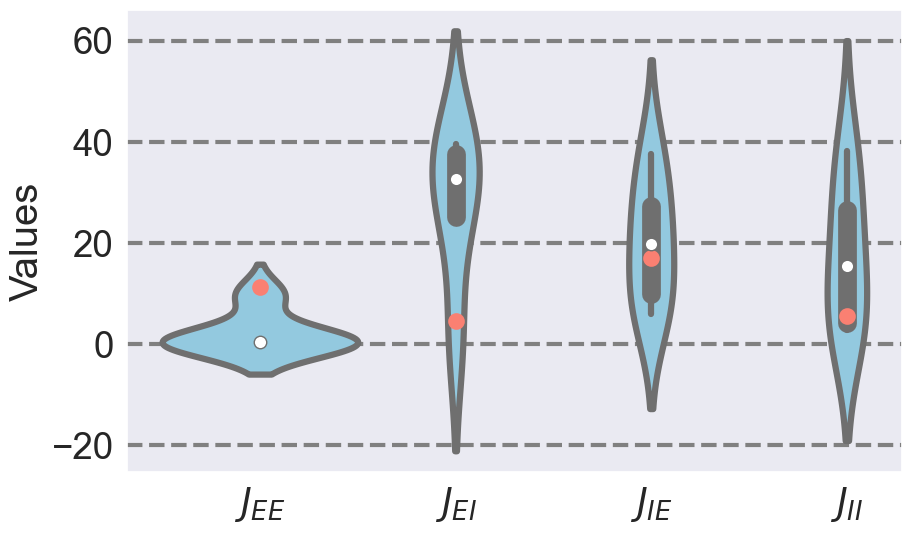

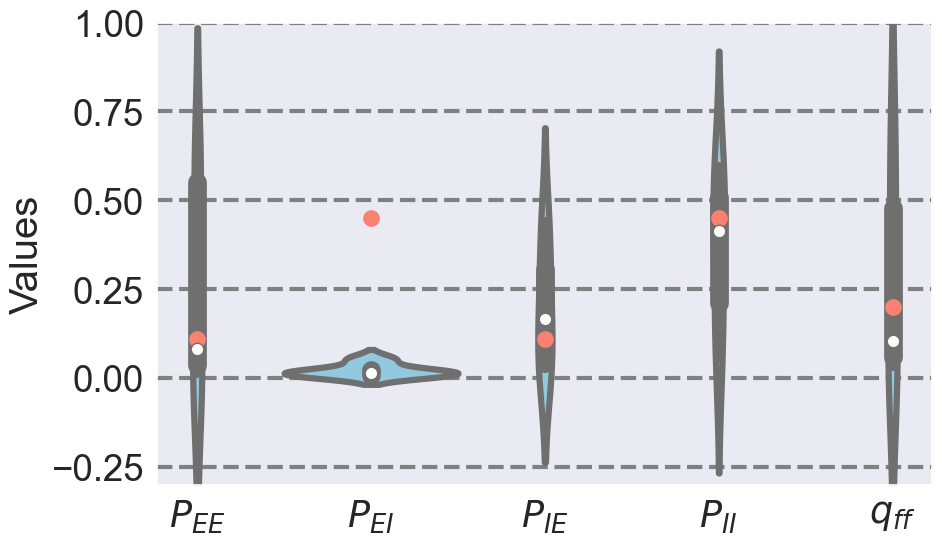

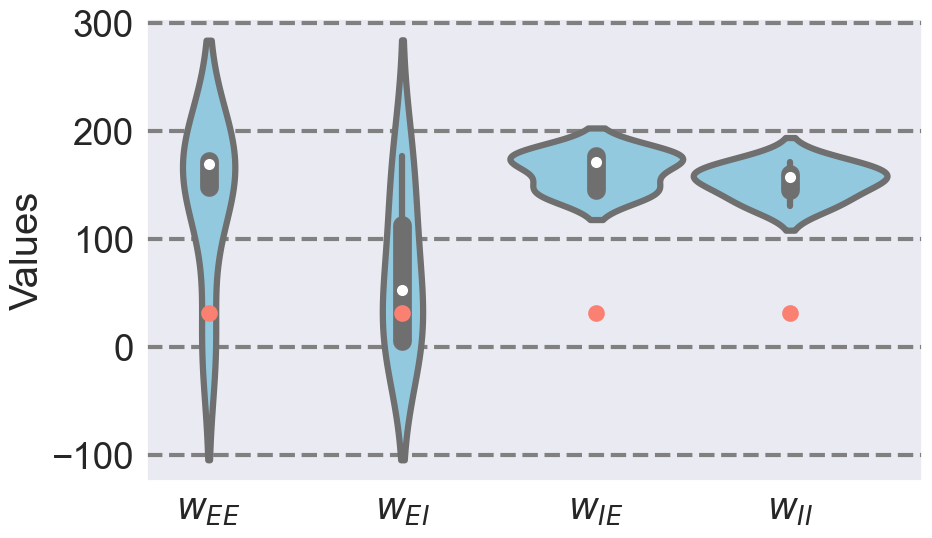

In [7]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45, 0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.ylim(-0.3,1)
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

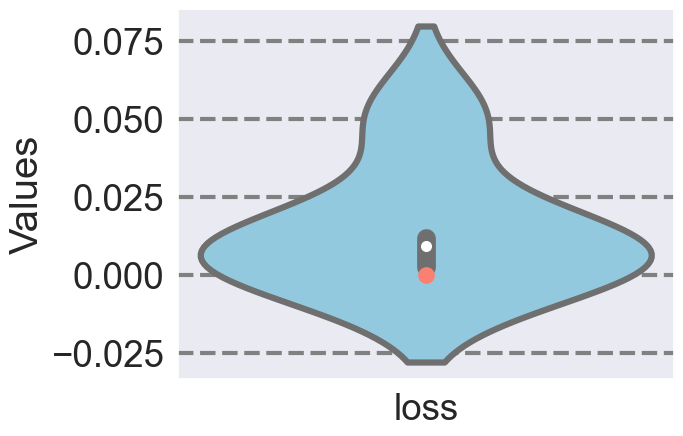

In [8]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [6.437301749429025e-07]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=linewidth_grid)
plt.xlabel('')
plt.ylabel('Values')
plt.show()

In [9]:
# remove the data with only low loss

data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
            if line[:9] == "heter_ff:":
                    heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"$J_{EE}$": params_to_J_scalar(J_array[0]), 
                 "$J_{EI}$": params_to_J_scalar(J_array[1]), 
                 "$J_{IE}$": params_to_J_scalar(J_array[2]),
                 "$J_{II}$": params_to_J_scalar(J_array[3]),
                 "$P_{EE}$": params_to_P_scalar(P_array[0]),
                 "$P_{EI}$": params_to_P_scalar(P_array[1]),
                 "$P_{IE}$": params_to_P_scalar(P_array[2]),
                 "$P_{II}$": params_to_P_scalar(P_array[3]),
                 "$w_{EE}$": params_to_w_scalar(w_array[0]),
                 "$w_{EI}$": params_to_w_scalar(w_array[1]),
                 "$w_{IE}$": params_to_w_scalar(w_array[2]),
                 "$w_{II}$": params_to_w_scalar(w_array[3]),
                 "$q_{ff}$": heter_ff,
                 "loss": loss}
        if loss < 0.04:
            data.append(datum)

NameError: name 'J_array' is not defined

In [ ]:
df = pd.DataFrame(data)
for datum in data[:5]:
    print(datum)
df.head()

""


In [ ]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45, 0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.ylim(-0.3,1)
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

KeyError: "None of [Index(['$J_{EE}$', '$J_{EI}$', '$J_{IE}$', '$J_{II}$'], dtype='object')] are in the [columns]"

<Figure size 1000x600 with 0 Axes>

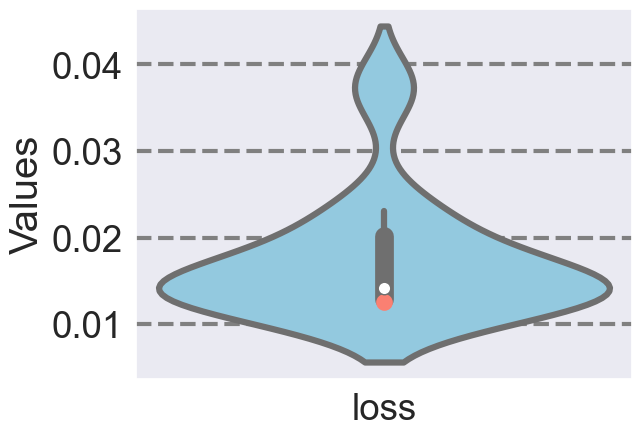

In [ ]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.012507867068052292]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=linewidth_grid)
plt.xlabel('')
plt.ylabel('Values')
plt.show()

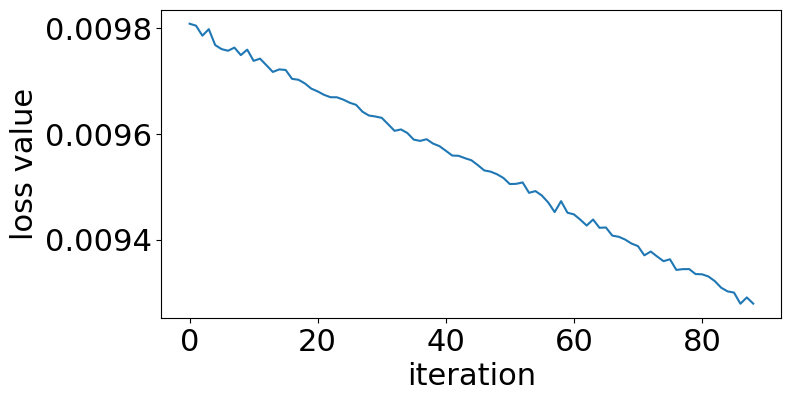

In [ ]:
# for loss in losses:
#     plt.plot(loss)
#     plt.ylim(0,0.2)
#     plt.xlim(0,120)
# plt.show()

plt.figure(figsize=(8,4))
plt.plot(losses[1])
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.show()